# Sample Usage of Spotify Playlist Scraper

This notebook demonstrates several ways in which the Spotify Playlist Scraper can be used to analyze data from Spotify playlists.

## Loading Data

First, we load the data from the selected playlist using `Playlist(url)`.

In [1]:
from SpotifyPlaylistScraper import *
inputs = ['1', '1', ('3', ''), '1', '1', '1', '1', '1', '1', '1', '1', '1']
inputs = [[list(i)] for i in inputs]
p = Playlist('https://open.spotify.com/playlist/2X38qrMnKVxbZMSrE72Ovh', fixing_inputs=inputs, verbose=False)
print(p)

Playlist name: The Magical 500
Playlist author: Tomorrowland
Number of likes: 3645
Number of songs: 391
Total duration: 84856 seconds


Upon loading the playlist, songs which might require fixing of details are automatically marked. Note that the inputs to fix these songs were previously recorded and are passed into the `fixing_inputs` argument in the appropriate format. These inputs are used to fix the songs automatically while loading the playlist. However, normally, the `fixing_inputs` parameters must not be used. Instead, one should call the playlist's `.fix()` method to correct any songs with incorrect information.

## Accessing Songs

The `Playlist` stores information on the songs it contains in a list. This list can be accessed using the `songs` attribute, and contains songs as `Song` objects. Here, we print the first 10 songs in the playlist.

In [2]:
p.songs[:10]

[Witching Hour by CamelPhat, Will Easton,
 Inside My Head (Voices) by Don Diablo,
 I Remember by Chris Lake,
 Superstar DJ by Jack Back,
 Drama by Wankelmut, Jack Wins,
 Like Gold (feat. Stephen Puth) by Loud Luxury, Frank Walker, Stephen Puth,
 Come Together by Franky Wah,
 1234 (feat. MC Ambush) by Afrojack, Fedde Le Grand, MC Ambush,
 Pump Up The Jam - NightFunk Radio Edit by Technotronic, NightFunk,
 I Don't Wanna Talk (feat. Amber Van Day) by Alok, HUGEL, Amber Van Day]

We may be interested in finding songs in the playlist with certain characteristics. The `original_name` attribute of songs indicated the part of the song name which has been identified as the original name of the song (rather than information on a remix and/or featured artists). Here, we check whether any songs are missing an `original_name`, as these songs may require fixing.

In [3]:
songs_to_fix = [s for s in p.songs if len(s.original_name.split())==0]
songs_to_fix

[Gouryella - Alan Fitzpatrick Tribute To '99 Remix by Gouryella, Ferry Corsten, Alan Fitzpatrick]

## Manually Updating Song Information

As we can see from above, one song is missing its `original_name`. We can print out its details below.

In [4]:
s = songs_to_fix[0]
print(s)
s.original_name

Gouryella - Alan Fitzpatrick Tribute To '99 Remix by Gouryella, Ferry Corsten, Alan Fitzpatrick


''

We see that the `original_name` attribute of this song is currently an empty string. This is because the script identified `Gouryella` as a featured artist rather than the name of the song. To fix this, we call the `fix_original_name()` method.

In [5]:
s.fix_original_name("Gouryella")
s.original_name

'Gouryella'

We have successfully corrected the `original_name` attribute of the song. It is also possible to update a song's list of featured artist using `s.fix_featured_artists()` and correct a song's remix information using `s.fix_remix()`.

## Finding the Most Common Artists in the Playlist

We can find out which artists are most represented in the playlist using a `Counter` from the `collections` library.

In [6]:
from collections import Counter
all_artists = [a for a_s in [s.artists for s in p.songs] for a in a_s]
c = Counter(all_artists)
del c[None]
c.most_common(5)

[('Jack Wins', 9),
 ('Oliver Heldens', 9),
 ('CamelPhat', 8),
 ('DubVision', 8),
 ('Nicky Romero', 8)]

If we wish to find only primary artists (rather than featured artists or remix artists), we can use the `s.get_primary_artists()` method.

In [7]:
primary_artists = [a for a_s in [s.get_primary_artists() for s in p.songs] for a in a_s]
c_primary = Counter(primary_artists)
c_primary.most_common(6)

[('CamelPhat', 8),
 ('Jack Wins', 8),
 ('Oliver Heldens', 7),
 ('Nicky Romero', 7),
 ('Armin van Buuren', 6),
 ('Armand Van Helden', 6)]

## Analyzing the Song Name Lengths

We can plot a historgram of the number words in each song's name by using the `original_name` attribute, which does not include information on featured artists and remix versions in the song name. As we can see, in this playlist the vast majority of songs are 3 words long or shorter.

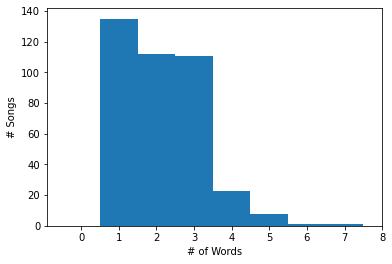

In [8]:
from numpy import arange
import matplotlib.pyplot as plt

song_name_length = [len(s.original_name.split()) for s in p.songs]
bins = arange(0, max(song_name_length) + 1.5) - 0.5

fig, ax = plt.subplots()
plt.hist(song_name_length, bins)
ax.set_xticks(bins + 0.5)

plt.xlabel("# of Words")
plt.ylabel("# Songs")
plt.show()

## Analyzing the Number of Artists per Song

Similarly, we can analyze the number of artists per song. In this playlist, most songs have 1 or 2 artists, but some have 3 or even 4.

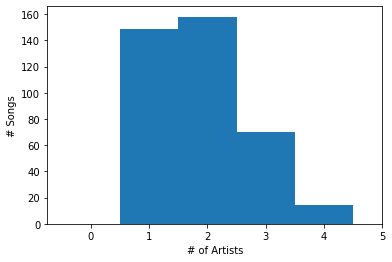

In [9]:
from numpy import arange
import matplotlib.pyplot as plt

num_artists = [len(s.artists) for s in p.songs]
bins = arange(0, max(num_artists) + 1.5) - 0.5

fig, ax = plt.subplots()
plt.hist(num_artists, bins)
ax.set_xticks(bins + 0.5)

plt.xlabel("# of Artists")
plt.ylabel("# Songs")
plt.show()

## Finding Similar Artists

We can use the `fuzzywuzzy` library to compare artists names and find similar artist names. This can help identify artists that also appear in collaborations, such as `Dimitri Vegas & Like Mike` in this example.

In [10]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
threshold = 90
l = list(c.keys())
for a in l:
    match, ratio = process.extract(a, l, limit=2)[1]
    if ratio >= threshold:
        l.remove(match)
        print(a, '-', match, ratio)

Wankelmut - NK 90
ARTY - Party Pupils 90
Ava Max - MAX 90
Justin Mylo - Mylo 90
Felix Da Housecat - Felix 90
Solardo - Ola 90
MKLA - MK 90
Dimitri Vegas & Like Mike - Dimitri Vegas 90
Guz - Guz Zanotto 90
Like Mike - Dimitri Vegas & Like Mike 90
